In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv("twitter.csv")

In [3]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [5]:
dataset['labels']=dataset['class'].map({0: "hate speech",
                                        1: "offensive langage",
                                        2: "no hate or offensive language"})

In [6]:
data = dataset[["tweet","labels"]]

In [7]:
import re
import nltk

In [8]:
from nltk.corpus import stopwords
stopword=set(stopwords.words("english"))

In [9]:
stemmer=nltk.SnowballStemmer("english")
import string

In [10]:
def clean (text):
 text = str (text). lower()
 text = re. sub('[.?]', '', text) 
 text = re. sub('https?://\S+|www.\S+', '', text)
 text = re. sub('<.?>+', '', text)
 text = re. sub('[%s]' % re. escape(string. punctuation), '', text)
 text = re. sub('\n', '', text)
 text = re. sub('\w\d\w', '', text)
 text = [word for word in text.split(' ') if word not in stopword]
 text=" ". join(text)
 text = [stemmer. stem(word) for word in text. split(' ')]
 text=" ". join(text)
 return text
data["tweet"] = data["tweet"]. apply(clean)

C:\Users\prane\AppData\Local\Temp\ipykernel_17424\261082463.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"]. apply(clean)


In [11]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,no hate or offensive language
1,rt mlee boy dat coldtyga dwn bad cuffin dat h...,offensive langage
2,rt urkindofbrand dawg rt babif ever fuck bitc...,offensive langage
3,rt cganderson vivabas look like tranni,offensive langage
4,rt shenikarobert shit hear might true might f...,offensive langage
...,...,...
24778,yous muthafin lie 0lifeask earl coreyemanuel r...,offensive langage
24779,youv gone broke wrong heart babi drove redneck...,no hate or offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,offensive langage
24781,youu got wild bitch tellin lie,offensive langage


In [12]:
x=np.array(data["tweet"])
y=np.array(data["labels"])

In [13]:
x

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt mlee boy dat coldtyga dwn bad cuffin dat hoe 1st place',
       ' rt urkindofbrand dawg rt babif ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [15]:
cv=CountVectorizer()
x=cv.fit_transform(x)

In [16]:
x

<24783x31392 sparse matrix of type '<class 'numpy.int64'>'
	with 207551 stored elements in Compressed Sparse Row format>

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x_train

<19826x31392 sparse matrix of type '<class 'numpy.int64'>'
	with 166070 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred=dt.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[  88,   28,  174],
       [  30,  718,   87],
       [ 153,  146, 3533]], dtype=int64)

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

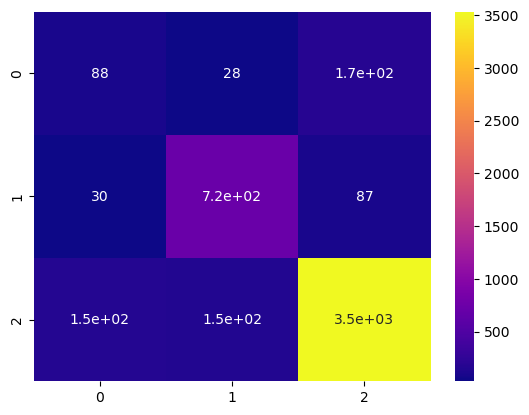

In [25]:
sns.heatmap(cm,annot=True,cmap='plasma')

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8753278192455114

In [27]:
sample="lets unite and kill all the people who are all protesting against the government"
sample=clean(sample)

In [28]:
sample

'let unit kill peopl protest govern'

In [29]:
data1=cv.transform([sample]).toarray()

In [30]:
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
dt.predict(data1)

array(['hate speech'], dtype=object)